In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn
import random

from google.colab import files
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve



file_upload = files.upload()
file_upload = files.upload()
data_train = pd.read_csv("1152100040_Faiq_Titanic-Train.csv")
data_test = pd.read_csv("test.csv")



Saving 1152100040_Faiq_Titanic-Train.csv to 1152100040_Faiq_Titanic-Train.csv


Saving test.csv to test.csv


In [ ]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
corr_matrix = data_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)


Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

Dengan menggunakan corr kita bisa melihat korelasi antar data numerikal, dari hasil tersebut menunjukkan Survived, Fare dan Parch memiliki korelasi.


In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Mengecek korelasi Survived dengan data non-numerikal lain dan beberapa fields juga data yang hilang seperti Cabin (204/891), Age (714/819) dan Embarked (889/891)

In [ ]:
data_train["Embarked"] = data_train["Embarked"].fillna("S")
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


mengisi data null pada embarked

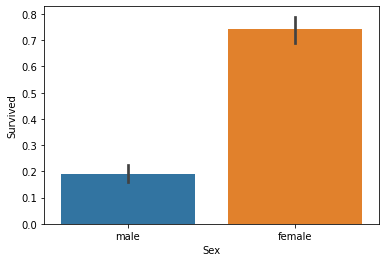

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.barplot(
    data = data_train,
    x = "Sex",
    y = "Survived"
)

plt.show()

Kita bisa melihat bahwa wanita memiliki peluang selamat lebih tinggi dari pada pria

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


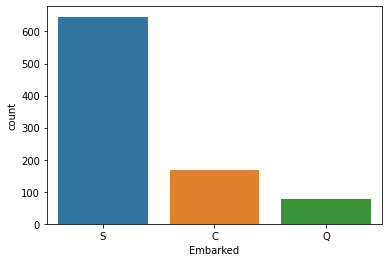

In [ ]:
sns.countplot(data_train["Embarked"])

Jumlah warga Southampton lebih tinggi dari Cherbourg dan Queenstown

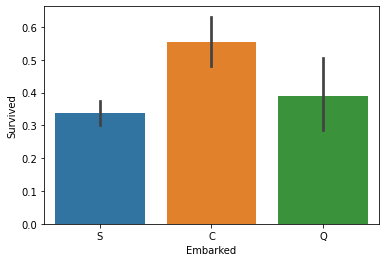

In [ ]:
sns.barplot(
    data = data_train,
    x = 'Embarked',
    y = "Survived"
)
plt.show()

Namun Cherbourg memiliki peluang selamat yang lebih tinggi

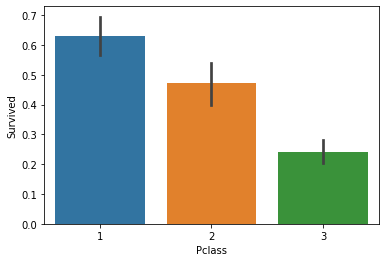

In [ ]:
sns.barplot(
    data = data_train,
    x = 'Pclass',
    y = "Survived"
)
plt.show()

Penumpang dari kelas atas memiliki peluang selamat sekitar 65%, kelas bawah memiliki peluang selamat sekitar 27%

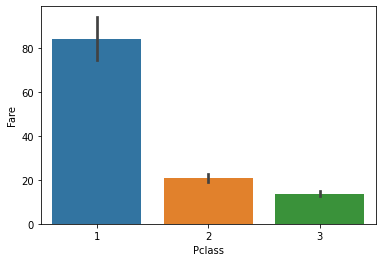

In [ ]:
sns.barplot(
    data = data_train,
    x = 'Pclass',
    y = "Fare"
)
plt.show()

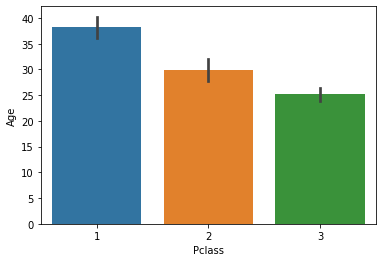

In [ ]:
sns.barplot(
    data = data_train,
    x = 'Pclass',
    y = "Age"
)
plt.show()

Menyimpulkan bahwa semakin tua penumpang, semakin tinggi kelas yang di singgahi nya.

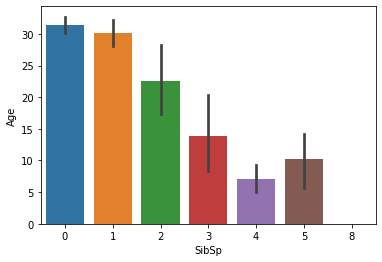

In [ ]:
sns.barplot(
    data = data_train,
    x = 'SibSp',
    y = "Age"
)
plt.show()

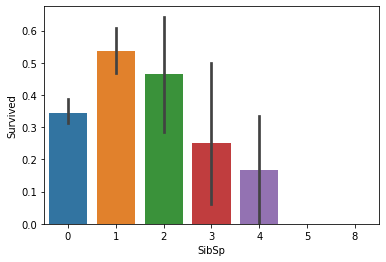

In [ ]:
sns.barplot(
    data = data_train,
    x = 'SibSp',
    y = "Survived"
)
plt.show()

SibSp (Siblings/Spouse) adalah data yang menunjukkan pasangan atau banyak kerabat yang ada/dibawa. berdasarkan grafik tersebut, penumpang dengan kerabat sedikit/ pasangan memiliki survive rate lebih tingggi dibandingkan memeliki banyak atau tidak sama sekali

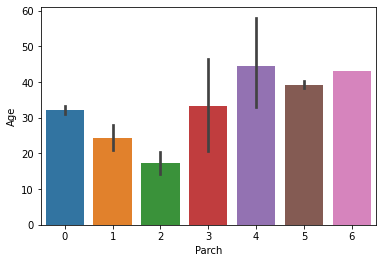

In [ ]:
sns.barplot(
    data = data_train,
    x = 'Parch',
    y = "Age"
)
plt.show()

Menunjukkan semakin banyak anak yang , semakin banyak anak yang dibawa nya

In [ ]:
shuffled_train = shuffle(data_train)
shuffled_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
256,257,1,1,"Thorne, Mrs. Gertrude Maybelle",female,NaN,0,0,PC 17585,79.2000,NaN,C
49,50,0,3,"Arnold-Franchi, Mrs. Josef (Josefine Franchi)",female,18.0,1,0,349237,17.8000,NaN,S
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
387,388,1,2,"Buss, Miss. Kate",female,36.0,0,0,27849,13.0000,NaN,S
130,131,0,3,"Drazenoic, Mr. Jozef",male,33.0,0,0,349241,7.8958,NaN,C
243,244,0,3,"Maenpaa, Mr. Matti Alexanteri",male,22.0,0,0,STON/O 2. 3101275,7.1250,NaN,S
91,92,0,3,"Andreasson, Mr. Paul Edvin",male,20.0,0,0,347466,7.8542,NaN,S


shuffling data agar tidak terjadi dominasi data

In [ ]:
shuffled_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
q = ['PassengerId', 'Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age']
data_train_set = shuffled_train.drop(q, axis=1)
data_train_set.head()

,Survived,Pclass,Sex,Fare,Embarked
890,0,3,male,7.7500,Q
9,1,2,female,30.0708,C
256,1,1,female,79.2000,C
49,0,3,female,17.8000,S
103,0,3,male,8.6542,S


berdasarkan kalkulasi sementara, saya bisa menyimpulkan ciri mana saja yang tepat untuk dipakai

In [ ]:
z = ['Name', 'Ticket', 'Cabin', 'SibSp', 'Parch', 'Age']
data_test_set = data_test.drop(z, axis=1)
data_test_set.head()

,PassengerId,Pclass,Sex,Fare,Embarked
0,892,3,male,7.8292,Q
1,893,3,female,7.0000,S
2,894,2,male,9.6875,Q
3,895,3,male,8.6625,S
4,896,3,female,12.2875,S


In [ ]:
mean = data_test_set["Fare"].mean()
data_test_set["Fare"] = data_test_set["Fare"].fillna(mean)
data_test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Fare         418 non-null    float64
 4   Embarked     418 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 16.5+ KB


In [ ]:
labelencoder = LabelEncoder()

data_train_set.iloc[:, 2] = labelencoder.fit_transform(data_train_set.iloc[:, 2].values)
data_train_set.iloc[:, 4] = labelencoder.fit_transform(data_train_set.iloc[:, 4].values)

data_test_set.iloc[:, 2] = labelencoder.fit_transform(data_test_set.iloc[:, 2].values)
data_test_set.iloc[:, 4] = labelencoder.fit_transform(data_test_set.iloc[:, 4].values)


Mengubah data string ke numerikal

In [ ]:
data_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 890 to 837
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Fare      891 non-null    float64
 4   Embarked  891 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 41.8 KB


In [ ]:
from sklearn import metrics
X = data_train_set.iloc[:, 1:5].values
Y = data_train_set.iloc[:, 0].values
start_nn = 3
end_nn = 15
nn =[]
scores = []
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.4, random_state=4)

for i in range(start_nn, end_nn+1):
  if i % 2 != 0:
    nn.append(i)
for j in nn:
  classifier = KNeighborsClassifier(n_neighbors = j, metric='minkowski', p = 2)
  classifier.fit(X_train, Y_train)
  Pred = classifier.predict(X_test)
  scores.append(metrics.accuracy_score(Y_test, Pred))

for k in range(0, len(nn)):
  print(f"Dengan {nn[k]}-nn mendapatkan score {scores[k]}")
  k += 1



Dengan 3-nn mendapatkan score 0.7507002801120448
Dengan 5-nn mendapatkan score 0.7563025210084033
Dengan 7-nn mendapatkan score 0.7478991596638656
Dengan 9-nn mendapatkan score 0.7450980392156863
Dengan 11-nn mendapatkan score 0.7338935574229691
Dengan 13-nn mendapatkan score 0.7338935574229691
Dengan 15-nn mendapatkan score 0.7310924369747899


Text(0, 0.5, 'Testing Accuracy')

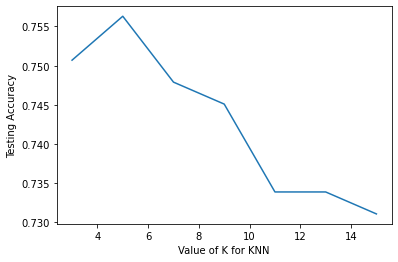

In [ ]:
import matplotlib.pyplot as plt
plt.plot(nn, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

Simulasi grafik akurasi dengan matplotlib menunjukkan skor akurasi yang cenderung turun 75-73%

In [ ]:
cm = confusion_matrix(Y_test, Pred)
ac = accuracy_score(Y_test, Pred)

In [ ]:
test = data_test_set.iloc[:, 1:5].values
prediction = knn.predict(test)
submission = pd.DataFrame({
    "PassengerId" : data_test_set["PassengerId"],
    "Survived": prediction
})

In [ ]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


Dari hasil tabel prediksi tersebut disimpulkan bahwa dari data 5 orang teratas, 2 selamat dan 3 tewas

In [ ]:
ac

0.7310924369747899

Tingkat akurasi 73%

In [ ]:
cm

array([[193,  37],
       [ 59,  68]])

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
folds = [5, 10]
for f in folds:
  scores_cross_val = cross_val_score(logreg, X,Y, cv = f)
for sc in range(0, len(folds)):
  print(f"Cross-Validation scores dengan {folds[sc]} adalah {scores_cross_val[sc]}")
  sc += 1

Cross-Validation scores dengan 5 adalah 0.7555555555555555
Cross-Validation scores dengan 10 adalah 0.7528089887640449


Maka berdasarkan hasil 5-Fold dan 10-Fold disimpulkan bahwa orang tersebut 75% hidup, 15% tewas

Cros Validation -
pada bagian ini akan menggunakan data shuffled dan tidak

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=5)

